In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 1. Unsupervised Learning

In [0]:
%matplotlib inline
import scipy
import numpy as np
import itertools
import matplotlib.pyplot as plt
import time

## 1. Generating the data

First, we will generate some data for this problem. Set the number of points $N=400$, their dimension $D=2$, and the number of clusters $K=2$, and generate data from the distribution $p(x|z=k) = \mathcal{N}(\mu_k, \Sigma_k)$.
  Sample $200$ data points for $k=1$ and 200 for $k=2$, with

  $$
    \mu_1=
    \begin{bmatrix}
      0.1 \\
      0.1
    \end{bmatrix}
    \ \text{,}\
    \mu_2=
    \begin{bmatrix}
      6.0 \\
      0.1
    \end{bmatrix}
    \ \text{ and }\
    \Sigma_1=\Sigma_2=
    \begin{bmatrix}
      10       & 7 \\
      7 & 10
    \end{bmatrix}
  $$
  Here, $N=400$. Since you generated the data, you already know which sample comes from which class.
  Run the cell in the IPython notebook to generate the data.

In [0]:
# TODO: Run this cell to generate the data
num_samples = 400
cov = np.array([[1., .7], [.7, 1.]]) * 10
mean_1 = [.1, .1]
mean_2 = [6., .1]

x_class1 = np.random.multivariate_normal(mean_1, cov, num_samples // 2)
x_class2 = np.random.multivariate_normal(mean_2, cov, num_samples // 2)
xy_class1 = np.column_stack((x_class1, np.zeros(num_samples // 2)))
xy_class2 = np.column_stack((x_class2, np.ones(num_samples // 2)))
data_full = np.row_stack([xy_class1, xy_class2])
np.random.shuffle(data_full)
data = data_full[:, :2]
labels = data_full[:, 2]

Make a scatter plot of the data points showing the true cluster assignment of each point using different color codes and shape (x for first class and circles for second class):

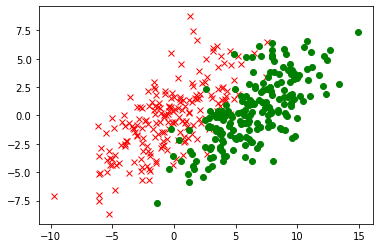

In [0]:
# TODO: Make a scatterplot for the data points showing the true cluster assignments of each point
# plt.plot(...) # first class, x shape
# plt.plot(...) # second class, circle shape
plt.plot(x_class1[:, 0], x_class1[:, 1], 'x', c='red')
plt.plot(x_class2[:, 0], x_class2[:, 1], 'o', c='green')
plt.show()

## 2. Implement and Run K-Means algorithm

Now, we assume that the true class labels are not known. Implement the k-means algorithm for this problem.
  Write two functions: `km_assignment_step`, and `km_refitting_step` as given in the lecture (Here, `km_` means k-means).
  Identify the correct arguments, and the order to run them. Initialize the algorithm with
  $$
    \hat\mu_1=
    \begin{bmatrix}
      0.0 \\
      0.0
    \end{bmatrix}
    \ \text{,}\
    \hat\mu_2=
    \begin{bmatrix}
      1.0 \\
      1.0
    \end{bmatrix}
  $$
  and run it until convergence.
  Show the resulting cluster assignments on a scatter plot either using different color codes or shape or both.
  Also plot the cost vs. the number of iterations. Report your misclassification error.

In [0]:
def cost(data, R, Mu):
    N, D = data.shape
    K = Mu.shape[1]
    J = 0
    for k in range(K):
        J += np.sum(np.dot(np.linalg.norm(data - np.array([Mu[:, k], ] * N), axis=1)**2, R))
    return J

In [0]:
# TODO: K-Means Assignment Step
def km_assignment_step(data, Mu):
    """ Compute K-Means assignment step
    
    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the cluster means locations
    
    Returns:
        R_new: a NxK matrix of responsibilities
    """
    N, D = data.shape  # Number of datapoints and dimension of datapoint
    K = Mu.shape[1]  # number of clusters
    r = np.zeros([N, K])
    #a matrix of NxK dimension for the distances of the the N datapoints to each of the K cluster centers. 
    for k in range(K):
         r[:, k] = np.linalg.norm(data - np.array([Mu[:, k], ] * N), axis=1)**2
    arg_min = np.argmin(r, axis=1) # argmax/argmin along dimension 1
    R_new = np.zeros([N, K]) # Set to zeros/ones with shape (N, K)
    R_new[np.arange(N),arg_min] = 1 # Assign to 1
    return R_new

In [0]:
# TODO: K-means Refitting Step
def km_refitting_step(data, R, Mu):
    """ Compute K-Means refitting step.
    
    Args:
        data: a NxD matrix for the data points
        R: a NxK matrix of responsibilities
        Mu: a DxK matrix for the cluster means locations
    
    Returns:
        Mu_new: a DxK matrix for the new cluster means locations
    """
    N, D = data.shape
    K = Mu.shape[1]
    Mu_new = np.zeros((D, K))
    for k in range(K):
        index = np.where(R[:, k] == 1)
        Mu_new[:, k] = np.mean(data[index, :], axis = 1)
    return Mu_new

In [0]:
N, D = data.shape
K = 2
max_iter = 100
class_init = np.random.binomial(1., .5, size=N)
R = np.vstack([class_init, 1 - class_init]).T

Mu = np.zeros([D, K])
Mu[:, 1] = 1.
R.T.dot(data), np.sum(R, axis=0)

iteration = []
clst = []
for it in range(max_iter):
    R = km_assignment_step(data, Mu)
    Mu = km_refitting_step(data, R, Mu)
    c = cost(data, R, Mu)
    iteration.append(it)
    clst.append(c)
    print(it, c)

class_1 = np.where(R[:, 0])
class_2 = np.where(R[:, 1])

0 37292.58165797178
1 37250.88887891708
2 37167.849589052785
3 37036.73687303193
4 36928.79657380079
5 36844.57439989758
6 36773.98217006367
7 36739.05559204959
8 36726.52159971727
9 36726.52159971727
10 36726.52159971727
11 36726.52159971727
12 36726.52159971727
13 36726.52159971727
14 36726.52159971727
15 36726.52159971727
16 36726.52159971727
17 36726.52159971727
18 36726.52159971727
19 36726.52159971727
20 36726.52159971727
21 36726.52159971727
22 36726.52159971727
23 36726.52159971727
24 36726.52159971727
25 36726.52159971727
26 36726.52159971727
27 36726.52159971727
28 36726.52159971727
29 36726.52159971727
30 36726.52159971727
31 36726.52159971727
32 36726.52159971727
33 36726.52159971727
34 36726.52159971727
35 36726.52159971727
36 36726.52159971727
37 36726.52159971727
38 36726.52159971727
39 36726.52159971727
40 36726.52159971727
41 36726.52159971727
42 36726.52159971727
43 36726.52159971727
44 36726.52159971727
45 36726.52159971727
46 36726.52159971727
47 36726.52159971727
4

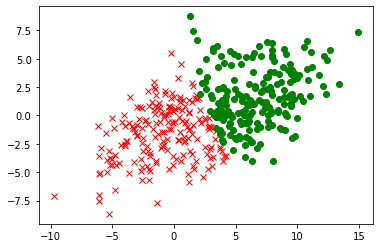

In [0]:
# TODO: Make a scatterplot for the data points showing the K-Means cluster assignments of each point
# plt.plot(...) # first class, x shape
# plt.plot(...) # second class, circle shape
plt.plot(data[class_1, 0], data[class_1,1], 'x', color='red')
plt.plot(data[class_2, 0], data[class_2,1], 'o', color='green')
plt.show()

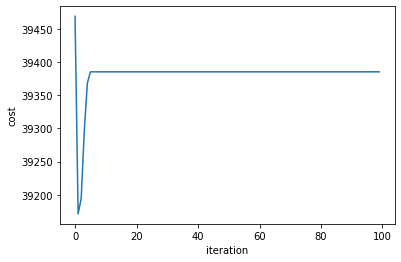

In [0]:
plt.ylabel('cost')
plt.xlabel('iteration')
plt.plot(iterations, costs)

In [0]:
labels_predict = np.argwhere(R == 1)[:, 1]
print("Error rate: ", np.mean(labels != labels_predict))

Error rate:  0.1875


## 3. Implement EM algorithm for Gaussian mixtures
Next, implement the EM algorithm for Gaussian mixtures.
  Write three functions: `log_likelihood`, `gm_e_step`, and `gm_m_step` as given in the lecture.
  Identify the correct arguments, and the order to run them.
  Initialize the algorithm with means as in Qs 2.1 k-means initialization, covariances with $\hat\Sigma_1=\hat\Sigma_2=I$,
  and $\hat\pi_1=\hat\pi_2$.

  In addition to the update equations in the lecture, for the M (Maximization) step, you also need to use this following equation to update the covariance $\Sigma_k$:
$$\hat{\mathbf{\Sigma}_k} = \frac{1}{N_k} \sum^N_{n=1} r_k^{(n)}(\mathbf{x}^{(n)} - \hat{\mathbf{\mu}_k})(\mathbf{x}^{(n)} - \hat{\mathbf{\mu}_k})^{\top}$$
    
  Run the algorithm until convergence and show the resulting cluster assignments on a scatter plot either using different color codes or shape or both.
  Also plot the log-likelihood vs. the number of iterations. Report your misclassification error.

In [0]:
def normal_density(x, mu, Sigma):
    return np.exp(-.5 * np.dot(x - mu, np.linalg.solve(Sigma, x - mu))) \
        / np.sqrt(np.linalg.det(2 * np.pi * Sigma))

In [0]:
def log_likelihood(data, Mu, Sigma, Pi):
    """ Compute log likelihood on the data given the Gaussian Mixture Parameters.
    
    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    
    Returns:
        L: a scalar denoting the log likelihood of the data given the Gaussian Mixture
    """
    # Fill this in:
    # N, D = ...  # Number of datapoints and dimension of datapoint
    # K = ... # number of mixtures
    # L, T = 0., 0.
    # for n in range(N):
    #     for k in range(K):
    #         # T += ... # Compute the likelihood from the k-th Gaussian weighted by the mixing coefficients 
    #     L += np.log(T)
    # return L

    N, D = data.shape  # Number of datapoints and dimension of datapoint
    K = Mu.shape[1] # number of mixtures
    L, T = 0., 0.
    for n in range(N):
        T = 0.
        for k in range(K):
            T += Pi[k] * normal_density(data[n], Mu[:, k], Sigma[k]) # Compute the likelihood from the k-th Gaussian weighted by the mixing coefficients 
        L += np.log(T)
    return L

In [0]:
# TODO: Gaussian Mixture Expectation Step
def gm_e_step(data, Mu, Sigma, Pi):
    """ Gaussian Mixture Expectation Step.

    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    
    Returns:
        Gamma: a NxK matrix of responsibilities 
    """
    # Fill this in:
    # N, D = ... # Number of datapoints and dimension of datapoint
    # K = ... # number of mixtures
    # Gamma = ... # zeros of shape (N,K), matrix of responsibilities
    # for n in range(N):
    #     for k in range(K):
    #         # Gamma[n, k] = .... 
    #     # Gamma[n, :] /= ... # Normalize by sum across second dimension (mixtures)
    # return Gamma
    N, D = data.shape # Number of datapoints and dimension of datapoint
    K = Mu.shape[1] # number of mixtures
    Gamma = np.zeros((N,K)) # zeros of shape (N,K), matrix of responsibilities
    for n in range(N):
        for k in range(K):
            Gamma[n, k] = Pi[k] * normal_density(data[n], Mu[:,k], Sigma[k])
        Gamma[n, :] /= np.sum(Gamma[n, :]) # Normalize by sum across second dimension (mixtures)
    return Gamma

In [0]:
# TODO: Gaussian Mixture Maximization Step
def gm_m_step(data, Gamma):
    """ Gaussian Mixture Maximization Step.

    Args:
        data: a NxD matrix for the data points
        Gamma: a NxK matrix of responsibilities 
    
    Returns:
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    """
    N, D = data.shape # Number of datapoints and dimension of datapoint
    K = Gamma.shape[1]  # number of mixtures
    Nk = np.sum(Gamma, axis=0) # Sum along first axis 
    Mu = np.zeros([D, K]) 
    Sigma = np.zeros((K,D,D))
    
    for k in range(K):
        for n in range(N):
            Mu[:,k] += Gamma[n,k] * data[n,:]/Nk[k]
    for k in range(K):
        for n in range(N):
            temp = (data[n,:] - Mu[:,k]).reshape((D,1))
            Sigma[k] += Gamma[n,k] * np.dot(temp, temp.T)/Nk[k]
    Pi = Nk / N 
    return Mu, Sigma, Pi

In [0]:
# TODO: Run this cell to call the Gaussian Mixture EM algorithm
N, D = data.shape
K = 2
Mu = np.zeros([D, K])
Mu[:, 1] = 1.
Sigma = [np.eye(2), np.eye(2)]
Pi = np.ones(K) / K
Gamma = np.zeros([N, K]) # Gamma is the matrix of responsibilities 

max_iter  = 200

iterations = []
costs = []
for it in range(max_iter):
    Gamma = gm_e_step(data, Mu, Sigma, Pi)
    Mu, Sigma, Pi = gm_m_step(data, Gamma)
    loglike = log_likelihood(data, Mu, Sigma, Pi)
    iterations.append(it)
    costs.append(loglike)
    print(it, loglike) # This function makes the computation longer, but good for debugging

class_1 = np.where(Gamma[:, 0] >= .5)
class_2 = np.where(Gamma[:, 1] >= .5)

0 -2108.569030648646
1 -2103.523067787013
2 -2101.578628940565
3 -2100.39571336378
4 -2099.4236632574143
5 -2098.464055686756
6 -2097.408395697052
7 -2096.1536982077464
8 -2094.5612603236423
9 -2092.519545762133
10 -2090.247433322861
11 -2088.2949298098933
12 -2086.9395731095738
13 -2086.1168033743156
14 -2085.660531138905
15 -2085.421344453549
16 -2085.298761138278
17 -2085.235414098758
18 -2085.2015105004816
19 -2085.1822768473003
20 -2085.1704904611533
21 -2085.1626047237182
22 -2085.1568538546535
23 -2085.1523420208
24 -2085.148604067255
25 -2085.1453911308645
26 -2085.1425645465742
27 -2085.140042670383
28 -2085.137773932699
29 -2085.13572305107
30 -2085.1338639070595
31 -2085.1321758226945
32 -2085.130641581603
33 -2085.1292463507466
34 -2085.1279770703873
35 -2085.1268220897928
36 -2085.1257709341003
37 -2085.1248141428205
38 -2085.1239431490208
39 -2085.1231501829784
40 -2085.122428191501
41 -2085.121770768269
42 -2085.1211720923784
43 -2085.1206268735164
44 -2085.1201303027024

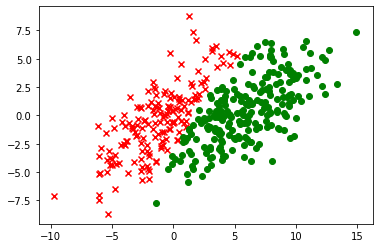

In [0]:
# TODO: Make a scatterplot for the data points showing the Gaussian Mixture cluster assignments of each point

plt.scatter(data[class_1][:, 0], data[class_1][:, 1], marker='x', color='red')
plt.scatter(data[class_2][:, 0], data[class_2][:, 1], marker='o', color = 'green')

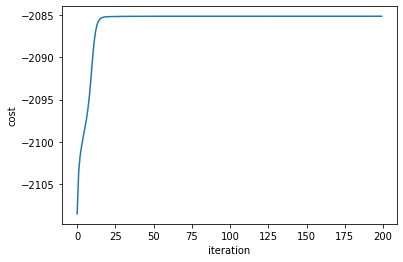

In [0]:
plt.ylabel('cost')
plt.xlabel('iteration')
plt.plot(iterations, costs)

In [0]:
labels_predict_EM = np.argwhere(Gamma >= 0.5)[:, 1]
print("Error rate: ", np.mean(labels != labels_predict_EM))

Error rate:  0.11


In [0]:
k_means_error_list = []
EM_error_list = []
k_means_time_list = []
EM_time_list = []

for i in range(5):
    num_samples = 400
    cov = np.array([[1., .7], [.7, 1.]]) * 10
    mean_1 = [.1, .1]
    mean_2 = [6., .1]

    x_class1 = np.random.multivariate_normal(mean_1, cov, num_samples // 2)
    x_class2 = np.random.multivariate_normal(mean_2, cov, num_samples // 2)
    xy_class1 = np.column_stack((x_class1, np.zeros(num_samples // 2)))
    xy_class2 = np.column_stack((x_class2, np.ones(num_samples // 2)))
    data_full = np.row_stack([xy_class1, xy_class2])
    np.random.shuffle(data_full)
    data = data_full[:, :2]
    labels = data_full[:, 2]

    N, D = data.shape
    K = 2
    max_iter = 200
    class_init = np.random.binomial(1., .5, size=N)
    R = np.vstack([class_init, 1 - class_init]).T

    start_time=time.clock()
    Mu = np.zeros([D, K])
    Mu[:, 1] = 1.
    R.T.dot(data), np.sum(R, axis=0)
    for it in range(max_iter):
        R = km_assignment_step(data, Mu)
        Mu = km_refitting_step(data, R, Mu)
        c = cost(data, R, Mu)
    labels_predict = np.argwhere(R == 1)[:, 1]
    k_means_error_list.append(np.mean(labels != labels_predict))
    time_use=time.clock()-start_time
    k_means_time_list.append(time_use)

    start_time = time.clock()
    Sigma = [np.eye(2), np.eye(2)]
    Pi = np.ones(K) / K
    Gamma = np.zeros([N, K]) # Gamma is the matrix of responsibilities
    for it in range(max_iter):
        Gamma = gm_e_step(data, Mu, Sigma, Pi)
        Mu, Sigma, Pi = gm_m_step(data, Gamma)
        loglike = log_likelihood(data, Mu, Sigma, Pi)
    labels_predict = np.argwhere(Gamma >= 0.5)[:, 1]
    EM_error_list.append(np.mean(labels != labels_predict))
    time_use=time.clock()-start_time
    EM_time_list.append(time_use)

In [0]:
print("BELOW IS THE RESULT FOR FIVE DIFFERENT DATA REALIZATION")
print("=================================================================")
print("THE K_MEANS REUSLT IS:", k_means_error_list)
print("=================================================================")
print("THE K_MEANS TIME IS:", k_means_time_list)
print("=================================================================")
print("THE EM_ERROR REUSLT IS:", EM_error_list)
print("=================================================================")
print("THE EM_ERROR REUSLT IS:", EM_time_list)

BELOW IS THE RESULT FOR FIVE DIFFERENT DATA REALIZATION
THE K_MEANS REUSLT IS: [0.2325, 0.2675, 0.2675, 0.2675, 0.2375]
THE K_MEANS TIME IS: [0.1449140000000284, 0.1250660000000039, 0.12583499999999503, 0.12067200000001321, 0.12221499999998287]
THE EM_ERROR REUSLT IS: [0.065, 0.0875, 0.1025, 0.1075, 0.0975]
THE EM_ERROR REUSLT IS: [11.571901000000025, 11.817532999999969, 11.66621299999997, 11.625350999999966, 11.75290799999999]


## 4. Comment on findings + additional experiments

Comment on the results:

* Compare the performance of k-Means and EM based on the resulting cluster assignments. **Answer:** Compare the performance of k-Means and EM besed on resulting cluster assignments, we could see that they are different. Also, notice the misclassification rate for k-Means is significantly larger than the misclassification rate for EM, we could draw the conclusion that EM has a better clusterring result than k-Means. 

* Compare the performance of k-Means and EM based on their convergence rate. What is the bottleneck for which method? **Answer:** From the result above we could see that for k-Means the convergenece time is between 0.1 point to 0.2 point. For EM method, the convergence time is roughly over 10 seconds. Therefore, k-Means converges way faster then EM, and the bottleneck for EM method is EM is more accurate, but takes longer computataion time, and for k-Means the bottleneck is it indeed takes relatively shorter time but the prediction is not as accurate as EM's.
* Experiment with 5 different data realizations (generate new data), run your algorithms, and summarize your findings. Does the algorithm performance depend on different realizations of data? **Answer:** From 


# 2. Reinforcement Learning

There are 3 files:
1. `maze.py`: defines the `MazeEnv` class, the simulation environment which the Q-learning agent will interact in.
2. `qlearning.py`: defines the `qlearn` function which you will implement, along with several helper functions. Follow the instructions in the file. 
3. `plotting_utils.py`: defines several plotting and visualization utilities. In particular, you will use `plot_steps_vs_iters`, `plot_several_steps_vs_iters`, `plot_policy_from_q`

In [0]:
# from qlearning import qlearn
# from maze import MazeEnv, ProbabilisticMazeEnv
# from plotting_utils import plot_steps_vs_iters, plot_several_steps_vs_iters, plot_policy_from_q

In [0]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
# from qlearning import *
# from maze import *

#  UTILITY FUNCTIONS


color_cycle = ['#377eb8', '#ff7f00', '#a65628',
               '#f781bf','#4daf4a',  '#984ea3',
               '#999999', '#e41a1c', '#dede00']

def plot_steps_vs_iters(steps_vs_iters, block_size=10):
    num_iters = len(steps_vs_iters)
    block_size = 10
    num_blocks = num_iters // block_size
    smooted_data = np.zeros(shape=(num_blocks, 1))
    for i in range(num_blocks):
        lower = i * block_size
        upper = lower + 9
        smooted_data[i] = np.mean(steps_vs_iters[lower:upper])
    
    plt.figure()
    plt.title("Steps to goal vs episodes")
    plt.ylabel("Steps to goal")
    plt.xlabel("Episodes")
    plt.plot(np.arange(1,num_iters,block_size), smooted_data, color=color_cycle[0])
    
    return

def plot_several_steps_vs_iters(steps_vs_iters_list, label_list, block_size=10):
    smooted_data_list = []
    for steps_vs_iters in steps_vs_iters_list:
        num_iters = len(steps_vs_iters)
        block_size = 10
        num_blocks = num_iters // block_size
        smooted_data = np.zeros(shape=(num_blocks, 1))
        for i in range(num_blocks):
            lower = i * block_size
            upper = lower + 9
            smooted_data[i] = np.mean(steps_vs_iters[lower:upper])
        smooted_data_list.append(smooted_data)
    
    plt.figure()
    plt.title("Steps to goal vs episodes")
    plt.ylabel("Steps to goal")
    plt.xlabel("Episodes")
    index = 0
    for label, smooted_data in zip(label_list, smooted_data_list):
        plt.plot(np.arange(1,num_iters,block_size), smooted_data, label=label, color=color_cycle[index])
        index += 1
    plt.legend()
    
    return


# this function sets color values for 
# Q table cells depending on expected reward value
def get_color(value, min_val, max_val):
    
    switcher={
                0:'gray',
                1:'indigo',
                2:'darkmagenta',
                3:'orchid',
                4:'lightpink',
             }

    step = (max_val-min_val)/5
    i = 0
    color='lightpink'
     
    for limit in np.arange(min_val, max_val, step):
        if limit <= value < limit+step:
            color = switcher.get(i)
        i+=1
    return color



# get first cell out of the start state
def get_next_cell(x1,x2,heatmap,policy_table,xlim=9,ylim=9):
    up_reward=-10000 
    down_reward=-10000 
    left_reward=-10000 
    right_reward=-10000 

    if (x1<ylim):
        if (policy_table[x1-1][x2]!=3):
            up_reward = heatmap[x1-1][x2]
    else: 
        up_reward = -1000
        
    if (x1>0):
        if (policy_table[x1+1][x2]!=0):
            down_reward = heatmap[x1+1][x2]
    else: 
        down_reward = -1000
        
    if (x2>0):
        if (policy_table[x1][x2-1]!=1):
            left_reward = heatmap[x1][x2-1] 
            
    else:
        left_reward = -1000
    
    if (x2<xlim):
        if (policy_table[x1][x2+1]!=2):
            right_reward = heatmap[x1][x2+1] 
            
    else:
        right_reward = -1000
    
    rewards = np.array([up_reward, down_reward, left_reward, right_reward])
    idx = np.argmax(rewards)
    next_cell = [(x1-1,x2), (x1+1,x2), (x1,x2-1), (x1,x2+1)][idx]
    choice = ['up', 'down', 'left', 'right']
    #print ('picking ',choice[idx])
    return next_cell
    
 
 

# get coordinates of the cells
# on the way from the start to goal state 
def get_path(x1,x2, policy_table):
    x_coords = [x1]
    y_coords = [x2]
    x1_new = x1
    x2_new = x2
        
    i=0
    num_steps = 0
    total_cells = len(policy_table)*len(policy_table[0])
    while (policy_table[x1][x2]!='G') and num_steps < total_cells:
        if (policy_table[x1][x2]==1): # right
            x2_new=x2+1
            #print(i, ' - moving right')
            
        elif (policy_table[x1][x2]==0):
            x1_new=x1-1
            #print(i, ' - moving up')
            
        elif (policy_table[x1][x2]==3):
            x1_new=x1+1  
            #print(i, ' - moving down')
        
        elif (policy_table[x1][x2]==2):
            x2_new=x2-1 
            #print(i, ' - moving left')
        
        x1 = x1_new
        x2 = x2_new
        x_coords.append(x1)
        y_coords.append(x2)
        num_steps += 1
    return x_coords, y_coords

# plot Q table 
# optimal path is highlighted and cells colored by their values
def plot_table(env, table_data, heatmap, goal_states, start_state, max_val, min_val, x_coords, y_coords):
    fig = plt.figure(dpi=80)
    ax = fig.add_subplot(1,1,1)
    plt.figure(figsize=(10,10))
    
    width = len(table_data[0])
    height = len(table_data)
    
    new_table = []
     
    for i in range(height):
        new_row = []
         
        for j in range(width):
            if env.map[i][j] == 0:
                new_row.append('')
            else:
                digit = table_data[i][j]
                if (digit==0):
                    new_row.append('\u2191') # up
                elif (digit==1):
                    new_row.append('\u2192') # right
                elif (digit==2):
                    new_row.append('\u2190') # left
                elif (digit==3):
                    new_row.append('\u2193') # down
                elif (digit=='G'):
                    new_row.append('G') # goal state
                elif (digit=='S'):
                    new_row.append('S') # goal state
                elif (digit==-1):
                    new_row.append('+') # All four directions
                else:
                    new_row.append('x') # unknown

        new_table.append(new_row)

    table = ax.table(cellText=new_table, loc='center',cellLoc='center')
     
    table.scale(1,2)
    
    for i in range(height):
        new_row = []
         
        for j in range(width):
            if new_table[i][j] == '':
                table[i, j].set_facecolor('black')
            else:
                table[i, j].set_facecolor(get_color(heatmap[i][j],min_val,max_val))
    
    for goal_state in goal_states:
        table[(goal_state[0], goal_state[1])].set_facecolor("limegreen")
    table[(start_state[0], start_state[1])].set_facecolor("yellow")
    ax.axis('off')
    table.set_fontsize(16)
    
    for i in range(len(x_coords)):
        table[(x_coords[i], y_coords[i])].get_text().set_color('red')
    plt.show()
    

# this function takes 3D Q table as an input
# and outputs optimal trajectory table (policy table)
# and corresponding excpected reward values of different cells (heatmap)
def get_policy_table(q_hat_3D, start_state, goal_states):
    policy_table = []
    heatmap = []
    
    for i in range(q_hat_3D.shape[0]):
        row = []
        heatmap_row = []
        for j in range(q_hat_3D.shape[1]):

            heatmap_row.append(np.max(q_hat_3D[i,j,:]))

            for goal_state in goal_states:
                if (goal_state[0]==i) and (goal_state[1]==j):
                    row.append('G')
                    
            if (start_state[0]==i) and (start_state[1]==j):
                row.append('S')
            else:
                if np.max(q_hat_3D[i,j,:]) == 0:
                    row.append(-1) # All zeros
                else:
                    row.append(np.argmax(q_hat_3D[i,j,:]))
        policy_table.append(row)
        heatmap.append(heatmap_row)
    
    return policy_table, heatmap

def plot_policy_from_q(q_hat, env):
    q_hat_3D = np.reshape(q_hat, (env.m_size, env.m_size, env.num_actions))
    max_val = q_hat_3D.max()
    min_val = q_hat_3D.min()
    start_state = env.get_coords_from_state(env._get_start_state)
    goal_states = env._get_goal_state
    goal_states = [env.get_coords_from_state(goal_state) for goal_state in goal_states]
    policy_table, heatmap = get_policy_table(q_hat_3D, start_state, goal_states)
    x,y = get_next_cell(start_state[0],start_state[1],heatmap,policy_table)
    x_coords, y_coords = get_path(x,y,policy_table)
    plot_table(env, policy_table, heatmap, goal_states, start_state,max_val,min_val, x_coords, y_coords)
    
    return

In [0]:
import numpy as np
import copy
import math
import random

ACTION_MEANING = {
    0: "UP",
    1: "RIGHT",
    2: "LEFT",
    3: "DOWN",
}

SPACE_MEANING = {
    1: "ROAD",
    0: "BARRIER",
    -1: "GOAL",
}


class MazeEnv:

    def __init__(self, start=[6,3], goals=[[1, 8]]):
        """Deterministic Maze Environment"""

        self.m_size = 10
        self.reward = 10
        self.num_actions = 4
        self.num_states = self.m_size * self.m_size

        self.map = np.ones((self.m_size, self.m_size))
        self.map[3, 4:9] = 0
        self.map[4:8, 4] = 0
        self.map[5, 2:4] = 0

        for goal in goals:
            self.map[goal[0], goal[1]] = -1

        self.start = start
        self.goals = goals
        self.obs = self.start

    def step(self, a):
        """ Perform a action on the environment

            Args:
                a (int): action integer

            Returns:
                obs (list): observation list
                reward (int): reward for such action
                done (int): whether the goal is reached
        """
        done, reward = False, 0.0
        next_obs = copy.copy(self.obs)

        if a == 0:
            next_obs[0] = next_obs[0] - 1
        elif a == 1:
            next_obs[1] = next_obs[1] + 1
        elif a == 2:
            next_obs[1] = next_obs[1] - 1
        elif a == 3:
            next_obs[0] = next_obs[0] + 1
        else:
            raise Exception("Action is Not Valid")

        if self.is_valid_obs(next_obs):
            self.obs = next_obs

        if self.map[self.obs[0], self.obs[1]] == -1:
            reward = self.reward
            done = True
        
        state = self.get_state_from_coords(self.obs[0], self.obs[1])

        return state, reward, done

    def is_valid_obs(self, obs):
        """ Check whether the observation is valid

            Args:
                obs (list): observation [x, y]

            Returns:
                is_valid (bool)
        """

        if obs[0] >= self.m_size or obs[0] < 0:
            return False

        if obs[1] >= self.m_size or obs[1] < 0:
            return False

        if self.map[obs[0], obs[1]] == 0:
            return False

        return True

    @property
    def _get_obs(self):
        """ Get current observation
        """
        return self.obs
    
    @property
    def _get_state(self):
        """ Get current observation
        """
        return self.get_state_from_coords(self.obs[0], self.obs[1])
    
    @property
    def _get_start_state(self):
        """ Get the start state
        """
        return self.get_state_from_coords(self.start[0], self.start[1])
    
    @property
    def _get_goal_state(self):
        """ Get the start state
        """
        goals = []
        for goal in self.goals:
            goals.append(self.get_state_from_coords(goal[0], goal[1]))
        return goals

    def reset(self):
        """ Reset the observation into starting point
        """
        self.obs = self.start
        state = self.get_state_from_coords(self.obs[0], self.obs[1])
        return state
    
    def get_state_from_coords(self, row, col):
        state = row * self.m_size + col
        return state
    
    def get_coords_from_state(self, state):
        row = int(math.floor(state/self.m_size))
        col = int(state % self.m_size)
        return row, col


class ProbabilisticMazeEnv(MazeEnv):
    """ (Q2.3) Hints: you can refer the implementation in MazeEnv 
    """
    
    def __init__(self, goals=[[2, 8]], p_random=0.05):
        """ Probabilistic Maze Environment 

            Args:
                goals (list): list of goals coordinates
                p_random (float): random action rate
        """
        self.m_size = 10
        self.reward = 10
        self.num_actions = 4
        self.num_states = self.m_size * self.m_size
        self.map = np.ones((self.m_size, self.m_size))
        self.map[3, 4:9] = 0
        self.map[4:8, 4] = 0
        self.map[5, 2:4] = 0
        for goal in goals:
            self.map[goal[0], goal[1]] = -1
        self.goals = goals
        self.start = [6,3]
        self.obs = self.start
        self.p_random = p_random

    def step(self, a):
        done, reward = False, 0.0
        next_obs = copy.copy(self.obs)
        
        rand  = random.uniform(0, 1)
        if rand <= self.p_random:
            a = np.random.choice(4)

        if a == 0:
            next_obs[0] = next_obs[0] - 1
        elif a == 1:
            next_obs[1] = next_obs[1] + 1
        elif a == 2:
            next_obs[1] = next_obs[1] - 1
        elif a == 3:
            next_obs[0] = next_obs[0] + 1
        else:
            raise Exception("Action is Not Valid")

        if self.is_valid_obs(next_obs):
            self.obs = next_obs

        if self.map[self.obs[0], self.obs[1]] == -1:
            reward = self.reward
            done = True
        
        state = self.get_state_from_coords(self.obs[0], self.obs[1])

        return state, reward, done

        

In [0]:
import numpy as np
import math
import copy

def qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy, init_beta=None, k_exp_sched=None):
    """ Runs tabular Q learning algorithm for stochastic environment.

    Args:
        env: instance of environment object 
        num_iters (int): Number of episodes to run Q-learning algorithm
        alpha (float): The learning rate between [0,1]
        gamma (float): Discount factor, between [0,1)
        epsilon (float): Probability in [0,1] that the agent selects a random move instead of 
                selecting greedily from Q value
        max_steps (int): Maximum number of steps in the environment per episode
        use_softmax_policy (bool): Whether to use softmax policy (True) or Epsilon-Greedy (False)
        init_beta (float): If using stochastic policy, sets the initial beta as the parameter for the softmax
        k_exp_sched (float): If using stochastic policy, sets hyperparameter for exponential schedule
            on beta
    
    Returns:
        q_hat: A Q-value table shaped [num_states, num_actions] for environment with with num_states 
            number of states (e.g. num rows * num columns for grid) and num_actions number of possible 
            actions (e.g. 4 actions up/down/left/right)
        steps_vs_iters: An array of size num_iters. Each element denotes the number 
            of steps in the environment that the agent took to get to the goal
            (capped to max_steps)
    """
    action_space_size = env.num_actions
    state_space_size = env.num_states
    q_hat = np.zeros(shape=(state_space_size, action_space_size))
    steps_vs_iters = np.zeros(num_iters)
    
    for i in range(num_iters):
        # TODO: Initialize current state by resetting the environment
        # curr_state = ...
        curr_state = env.reset()
        num_steps = 0
        done = False

        # TODO: Keep looping while environment isn't done and less than maximum steps
        # while ...:
        while (done != True) and (num_steps < max_steps):
            num_steps += 1

            # Choose an action using policy derived from either softmax Q-value 
            # or epsilon greedy
            if use_softmax_policy:
                assert(init_beta is not None)
                assert(k_exp_sched is not None)

                beta = beta_exp_schedule(init_beta, i, k_exp_sched)
                action = softmax_policy(q_hat, beta, curr_state, action_space_size)
            else:
                # TODO: Epsilon-greedy
                action = epsilon_greedy(q_hat, epsilon, curr_state, action_space_size)
            next_state, reward, done = env.step(action)

            # TODO: Update Q_value
            if next_state != curr_state:
                new_value = alpha * (reward + gamma * np.max(q_hat[next_state, :]) - q_hat[curr_state, action])
                q_hat[curr_state, action] = q_hat[curr_state, action] + new_value
                curr_state = next_state
        steps_vs_iters[i] = num_steps
    
    return q_hat, steps_vs_iters


def epsilon_greedy(q_hat, epsilon, state, action_space_size):
    """ Chooses a random action with p_rand_move probability,
    otherwise choose the action with highest Q value for
    current observation

    Args:
        q_hat_3D: A Q-value table shaped [num_rows, num_col, num_actions] for 
            grid environment with num_rows rows and num_col columns and num_actions 
            number of possible actions
        epsilon (float): Probability in [0,1] that the agent selects a random 
            move instead of selecting greedily from Q value
        obs: A 2-element array with integer element denoting the row and column
            that the agent is in
        action_space_size (int): number of possible actions
    
    Returns:
        action (int): A number in the range [0, action_space_size-1]
            denoting the action the agent will take
    """
    # TODO: Implement your code here
    # Hint: Sample from a uniform distribution and check if the sample is below
    # a certain threshold
    prob = np.random.uniform()
    if np.all(q_hat[state, :] == 0) == True:
        action = np.random.choice(action_space_size)
    elif (prob <= epsilon):
        action = np.random.choice(action_space_size)
    else:
        action = q_hat[state,:].argmax()
    return action
    

def softmax_policy(q_hat, beta, state, action_space_size):
    """ Choose action using policy derived from Q, using
    softmax of the Q values divided by the temperature.

    Args:
        q_hat: A Q-value table shaped [num_rows, num_col, num_actions] for 
            grid environment with num_rows rows and num_col columns
        beta (float): Parameter for controlling the stochasticity of the action
        obs: A 2-element array with integer element denoting the row and column
            that the agent is in

    Returns:
        action (int): A number in the range [0, action_space_size-1]
            denoting the action the agent will take
    """
    prob = stable_softmax(beta * q_hat)
    if all(ele == 0 for ele in q_hat[state]):
        action = np.random.choice(action_space_size) 
    else:
        action = np.random.choice(action_space_size, p=prob[state,:])
    return action


def beta_exp_schedule(init_beta, iteration, k=0.1):
   beta = init_beta * np.exp(k * iteration)
   return beta

def stable_softmax(x, axis=1):
    """ Numerically stable softmax:
    softmax(x) = e^x /(sum(e^x))
               = e^x / (e^max(x) * sum(e^x/e^max(x)))
    
    Args:
        x: An N-dimensional array of floats
        axis: The axis for normalizing over.
    
    Returns:
        output: softmax(x) along the specified dimension
    """
    max_x = np.max(x, axis, keepdims=True)
    z = np.exp(x - max_x)
    output = z / np.sum(z, axis, keepdims=True)
    
    return output

## 1. Basic Q Learning experiments

(a) Run your algorithm several times on the given environment. Use the following hyperparameters:
1. Number of episodes = 200
2. Alpha ($\alpha$) learning rate = 1.0
2. Maximum number of steps per episode = 100. An episode ends when the agent reaches a goal state, or uses the maximum number of steps per episode
3. Gamma ($\gamma$) discount factor = 0.9
4. Epsilon ($\epsilon$) for $\epsilon$-greedy = 0.1 (10% of the time)


In [0]:
# TODO: Fill this in
num_iters = 200
alpha = 1.0
gamma = 0.9
epsilon = 0.1
max_steps = 100
use_softmax_policy = False

# TODO: Instantiate the MazeEnv environment with default arguments
env = MazeEnv()

# TODO: Run Q-learning:
q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy)

Plot the steps to goal vs training iterations (episodes):

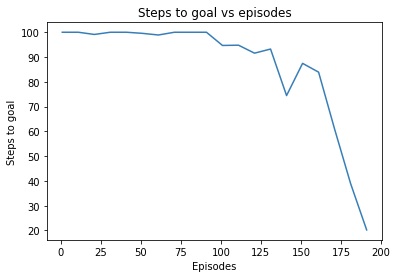

In [0]:
# TODO: Plot the steps vs iterations
plot_steps_vs_iters(steps_vs_iters)

Visualize the learned greedy policy from the Q values:

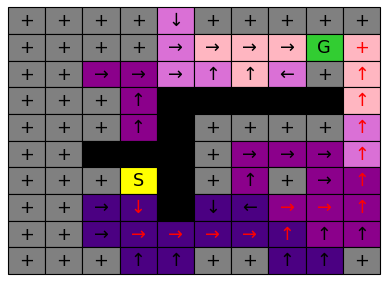

<Figure size 720x720 with 0 Axes>

In [0]:
# TODO: plot the policy from the Q value
plot_policy_from_q(q_hat, env)

(b) Run your algorithm by passing in a list of 2 goal locations: (1,8) and (5,6). Note: we are using 0-indexing, where (0,0) is top left corner. Report on the results.

In [0]:
# TODO: Fill this in (same as before)
num_iters = 200
alpha = 1.0
gamma = 0.9
epsilon = 0.1
max_steps = 100
use_softmax_policy = False

# TODO: Set the goal
goal_locs = [[1, 8], [5, 6]]
env = MazeEnv(goals= goal_locs)

# TODO: Run Q-learning:
q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy)

Plot the steps to goal vs training iterations (episodes):

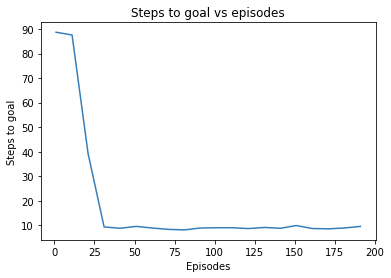

In [0]:
# TODO: Plot the steps vs iterations
plot_steps_vs_iters(steps_vs_iters)

Plot the steps to goal vs training iterations (episodes):

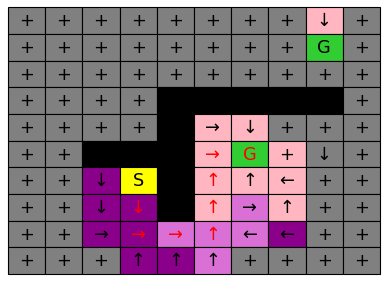

<Figure size 720x720 with 0 Axes>

In [0]:
# TODO: plot the policy from the Q values
plot_policy_from_q(q_hat, env)

## 2. Experiment with the exploration strategy, in the original environment

(a) Try different $\epsilon$ values in $\epsilon$-greedy exploration: We asked you to use a rate of $\epsilon$=10%, but try also 50% and 1%. Graph the results (for 3 epsilon values) and discuss the costs and benefits of higher and lower exploration rates.

In [0]:
# TODO: Fill this in (same as before)
num_iters = 200
alpha = 1.0
gamma = 0.9
max_steps = 100
use_softmax_policy = False

# TODO: set the epsilon lists in increasing order:
epsilon_list = [0.01, 0.1, 0.5]

env = MazeEnv()

steps_vs_iters_list = []
for epsilon in epsilon_list:
   q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy)
   steps_vs_iters_list.append(steps_vs_iters)

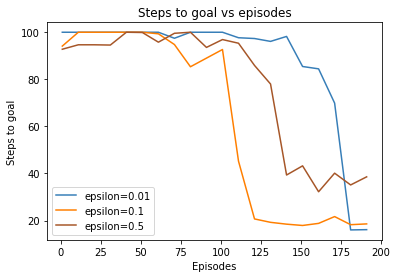

In [0]:
# TODO: Plot the results
label_list = ["epsilon={}".format(eps) for eps in epsilon_list]
plot_several_steps_vs_iters(steps_vs_iters_list, label_list)

(b) Try exploring with policy derived from **softmax of Q-values** described in the Q learning lecture. Use the values of $\beta \in \{1, 3, 6\}$ for your experiment, keeping $\beta$ fixed throughout the training.

In [0]:
# TODO: Fill this in for Static Beta with softmax of Q-values
num_iters = 200
alpha = 1.0
gamma = 0.9
epsilon = 0.1
max_steps = 100

# TODO: Set the beta
beta_list = [1, 3, 6]
use_softmax_policy = True
k_exp_schedule = 0.0
env = MazeEnv()
steps_vs_iters_list = []
for beta in beta_list:
    q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy, beta, k_exp_schedule)
    steps_vs_iters_list.append(steps_vs_iters)

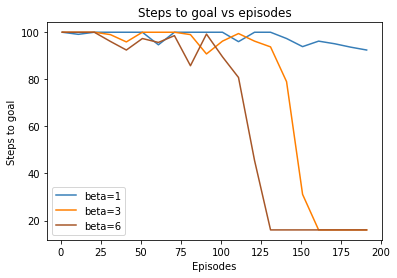

In [0]:
label_list = ["beta={}".format(beta) for beta in beta_list]
# TODO: 
plot_several_steps_vs_iters(steps_vs_iters_list, label_list)

(c) Instead of fixing the $\beta = \beta_0$ to the initial value, we will increase the value of $\beta$ as the number of episodes $t$ increase:

$$\beta(t) = \beta_0 e^{kt}$$

That is, the $\beta$ value is fixed for a particular episode.
Run the training again for different values of $k \in \{0.05, 0.1, 0.25, 0.5\}$, keeping $\beta_0 = 1.0$. Compare the results obtained with this approach to those obtained with a static $\beta$ value.

In [0]:
# TODO: Fill this in for Dynamic Beta
num_iters = 200
alpha = 1.0
gamma = 0.9
epsilon = 0.1
max_steps = 100

# TODO: Set the beta
beta = 1.0
use_softmax_policy = True
k_exp_schedule_list = [0.05, 0.1, 0.25, 0.5]
env = MazeEnv()

steps_vs_iters_list = []
for k_exp_schedule in k_exp_schedule_list:
    q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy, beta, k_exp_schedule)
    steps_vs_iters_list.append(steps_vs_iters)

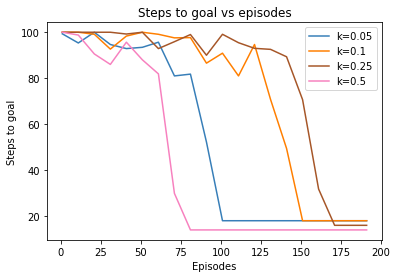

In [0]:
# TODO: Plot the steps vs iterations
label_list = ["k={}".format(k_exp_schedule) for k_exp_schedule in k_exp_schedule_list]
plot_several_steps_vs_iters(steps_vs_iters_list, label_list)

## 3. Stochastic Environments

(a) Make  the  environment  stochastic  (uncertain),  such  that  the  agent  only  has  a  95% chance  of  moving  in  the  chosen  direction,  and  has  a  5%  chance  of  moving  in  some random direction.

In [0]:
# TODO: Implement ProbabilisticMazeEnv in maze.py

(b) Change the learning rule to handle the non-determinism, and experiment with different probability of environment performing random action $p_{rand} \in \{0.05, 0.1, 0.25, 0.5\}$ in this new rule. How does performance vary as the environment becomes more stochastic?

Use the same parameters as in first part, except change the alpha ($\alpha$) value to be **less than 1**, e.g. 0.5.

In [0]:
# TODO: Fill this in for Dynamic Beta
num_iters = 200
alpha = 0.5
gamma = 0.9
epsilon = 0.1
max_steps = 100
use_softmax_policy = False
beta = 1.0

# Set the environment probability of random
env_p_rand_list = [0.05, 0.1, 0.25, 0.5]

steps_vs_iters_list = []
for env_p_rand in env_p_rand_list:
    # Instantiate with ProbabilisticMazeEnv
    env = ProbabilisticMazeEnv(p_random=env_p_rand)

    # Note: We will repeat for several runs of the algorithm to make the result less noisy
    avg_steps_vs_iters = np.zeros(num_iters)
    for i in range(10):
        # q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy, init_beta=6, k_exp_sched=0.5)
        q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy)
        avg_steps_vs_iters += steps_vs_iters
    avg_steps_vs_iters /= 10
    steps_vs_iters_list.append(avg_steps_vs_iters)

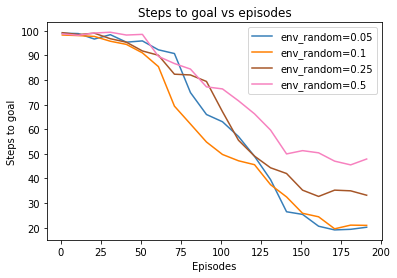

In [0]:
label_list = ["env_random={}".format(env_p_rand) for env_p_rand in env_p_rand_list]
plot_several_steps_vs_iters(steps_vs_iters_list, label_list)

# 3. Did you complete the course evaluation?

**ABSOLUTELY YES** Thank you so much my dearest professors and TAs.